In [ ]:

pip install tensorflow


In [ ]:
pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sbs
import os

In [ ]:
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras {tf.__version__}")


Tensorflow Version 2.15.0
Keras 2.15.0


In [ ]:
!pip install psutil
import os
import psutil

# Get the current process
process = psutil.Process(os.getpid())

# Get the command line arguments for the process
cmdline = process.cmdline()

# Print the command line arguments
print(cmdline)

['/usr/bin/python3', '-m', 'colab_kernel_launcher', '-f', '/root/.local/share/jupyter/runtime/kernel-088070ac-9fd4-48fc-82eb-6d030aaae309.json']


In [ ]:
tf.config.list_physical_devices("GPU")


[]

In [ ]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
check_list = ["CPU","GPU"]

for device in check_list:
    out = tf.config.list_physical_devices(device)
    if len(out) > 0:
        print(f"(device) is available!")
        print(f"Details >> {out}")
    else :
        print(f"(device) is not present")

(device) is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
(device) is not present


In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [ ]:
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
X_train_full[0].shape

(28, 28)

In [ ]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [ ]:

X_test.shape

(10000, 28, 28)

In [ ]:
len(X_test[1][0])

28

In [ ]:
# create a validation data set of the full training data
X_valid,X_train = X_train_full[:5000]/ 255.,X_train_full[5000:]/255.
y_valid,y_train = y_train_full[:5000]/ 255.,y_train_full[5000:]/255.

X_test = X_test / 255.

In [ ]:
# Train- 5000
# Test-10000
# Val- 5000

In [ ]:
len(X_train_full[5000:])

55000

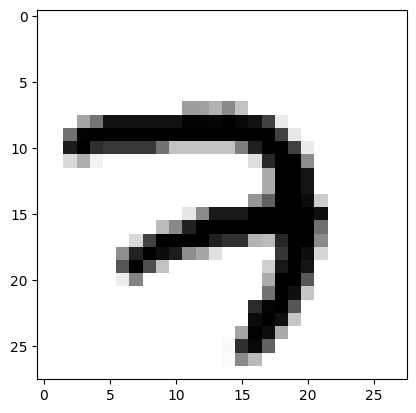

In [ ]:
# Lets Show the image
plt.imshow(X_train[0],cmap="binary")
plt.show()

<Axes: >

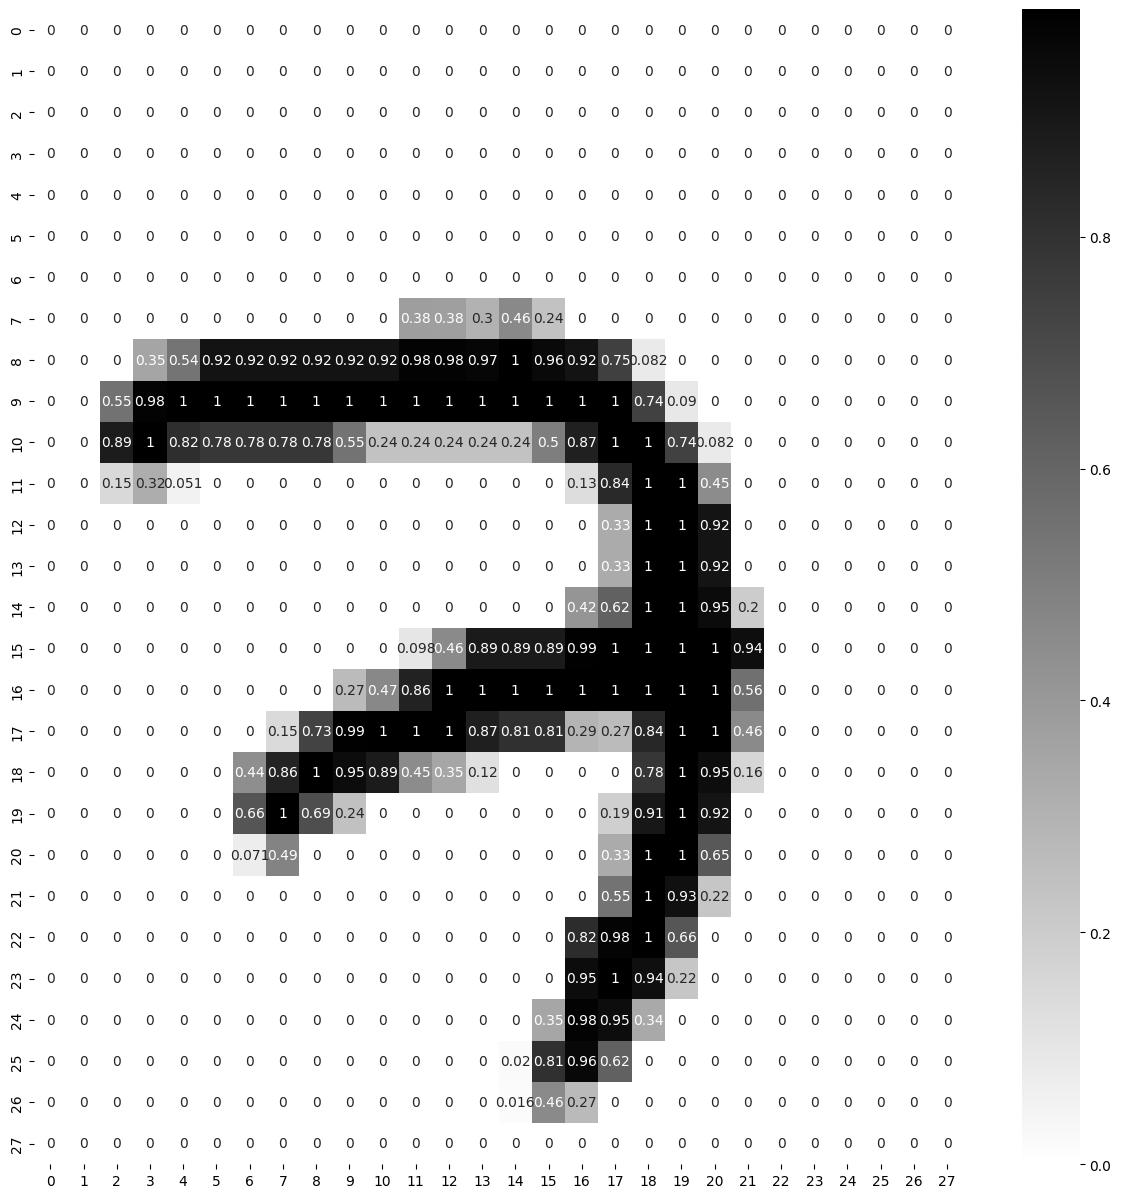

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0],annot = True, cmap = 'binary')

In [ ]:
# METHOD-1
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

In [ ]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28],name = "inputLayer"),
          tf.keras.layers.Dense(300,activation = "relu",name= "hiddenLayer1",kernel_regularizer=regularizers.L2(1e-4)),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100,activation = "relu",name= "hiddenLayer2"),
          tf.keras.layers.Dropout(0,2),
          tf.keras.layers.Dense(10,activation = "relu",name= "outputLayer"),]

model_clf = tf.keras.models.Sequential(LAYERS)

In [ ]:
# METHOD-2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
model= Sequential()
model.add(Flatten(input_shape=[28,28],name = "inputLayer")),
model.add(Dense(units=64,activation = "relu",kernel_initializer=tf.keras.initializers.HeNormal(seed=None))),
model.add(Dropout(0.2))
model.add(Dense(units=32,activation = "relu",kernel_initializer=tf.keras.initializers.HeNormal(seed=None))),
model.add(Dropout(0.1))
model.add(Dense(units=16,activation = "relu",kernel_initializer=tf.keras.initializers.HeNormal(seed=None))),
model.add(Dropout(0,2))
model.add(Dense(units=10,activation = "softmax"))



In [ ]:
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization (Batch  (None, 300)               1200      
 Normalization)                                                  
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                        

In [ ]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [ ]:
hidden1.get_weights()[0].shape

(784, 300)

In [ ]:

hidden1.get_weights()

[array([[ 0.03834902, -0.07406109, -0.03690682, ..., -0.03050068,
         -0.05661567,  0.04447658],
        [-0.02094254, -0.03379717,  0.03019308, ...,  0.00405703,
         -0.04519195,  0.03188917],
        [-0.01415142, -0.00880108, -0.00810705, ...,  0.01787378,
          0.06969677,  0.01441783],
        ...,
        [ 0.07082102, -0.04534812, -0.05161499, ...,  0.01538213,
          0.07418865, -0.06250933],
        [-0.05020827, -0.05798981,  0.00805685, ..., -0.06150262,
         -0.05492402, -0.03329402],
        [ 0.01701711, -0.05163259, -0.05407688, ...,  0.02033766,
         -0.04691224,  0.02354246]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
weights , biases = hidden1.get_weights()

In [ ]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[ 0.03834902, -0.07406109, -0.03690682, ..., -0.03050068,
        -0.05661567,  0.04447658],
       [-0.02094254, -0.03379717,  0.03019308, ...,  0.00405703,
        -0.04519195,  0.03188917],
       [-0.01415142, -0.00880108, -0.00810705, ...,  0.01787378,
         0.06969677,  0.01441783],
       ...,
       [ 0.07082102, -0.04534812, -0.05161499, ...,  0.01538213,
         0.07418865, -0.06250933],
       [-0.05020827, -0.05798981,  0.00805685, ..., -0.06150262,
        -0.05492402, -0.03329402],
       [ 0.01701711, -0.05163259, -0.05407688, ...,  0.02033766,
        -0.04691224,  0.02354246]], dtype=float32)

In [ ]:
print("shape\n",biases.shape)
biases

shape
 (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer = OPTIMIZER,
                  metrics=METRICS)

In [ ]:
# training

EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)


Epoch 1/5
1719/1719 [==============================] - 15s 8ms/step - loss: 0.1560 - accuracy: 0.0983 - val_loss: 0.0501 - val_accuracy: 0.0958
Epoch 2/5
1719/1719 [==============================] - 19s 11ms/step - loss: 0.0497 - accuracy: 0.0990 - val_loss: 0.0495 - val_accuracy: 0.0958
Epoch 3/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0493 - accuracy: 0.0990 - val_loss: 0.0491 - val_accuracy: 0.0958
Epoch 4/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0489 - accuracy: 0.0990 - val_loss: 0.0488 - val_accuracy: 0.0958
Epoch 5/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0486 - accuracy: 0.0990 - val_loss: 0.0484 - val_accuracy: 0.0958


In [ ]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.156050,0.098255,0.050074,0.0958
1,0.049675,0.098982,0.049539,0.0958
2,0.049261,0.098982,0.049127,0.0958
3,0.048904,0.098982,0.048766,0.0958
4,0.048577,0.098982,0.048428,0.0958


<Axes: >

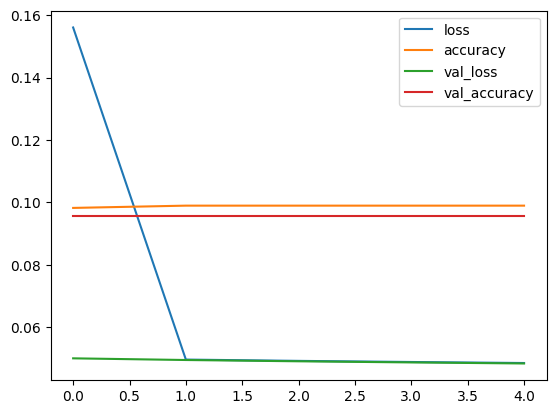

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 14.5871 - accuracy: 0.0980


[14.587101936340332, 0.09799999743700027]

In [ ]:
X_new = X_test[:3]

In [ ]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

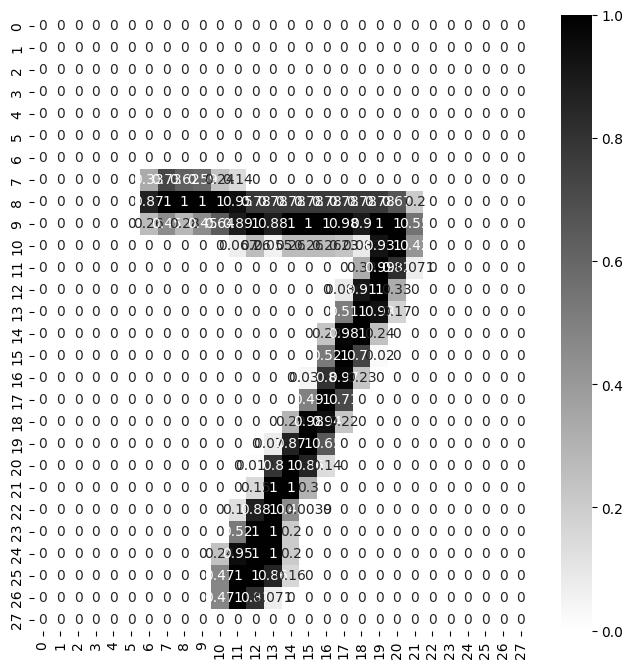

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(X_test[0],annot= True, cmap = "binary")

In [ ]:
y_prob = model_clf.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 104ms/step


array([[ 7.926,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ],
       [14.406,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ],
       [ 7.866,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ]], dtype=float32)

In [ ]:
y_prob

array([[ 7.9264655,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ],
       [14.406164 ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ],
       [ 7.86592  ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(y_prob,axis = -1)

In [ ]:
y_pred

array([0, 0, 0])

In [ ]:
actual

array([7, 2, 1], dtype=uint8)

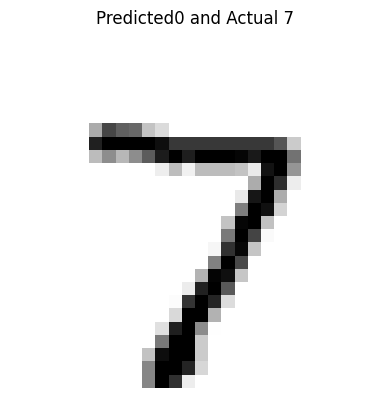

Predictrd Output


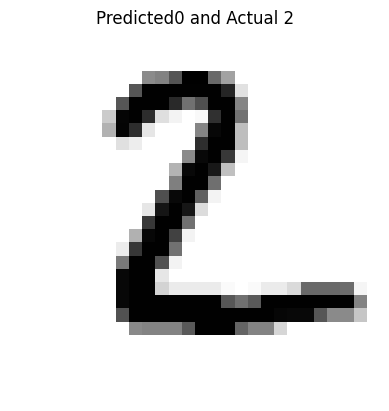

Predictrd Output


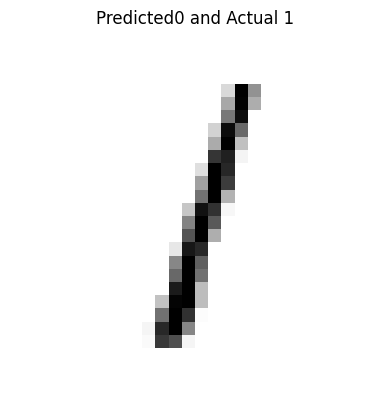

Predictrd Output


In [ ]:
#plot
for data,pred,actual_data in zip(X_new,y_pred,actual):
  plt.imshow(data,cmap ="binary")
  plt.title(f"Predicted{pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("Predictrd Output")